In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [3]:
df = pd.read_csv("./pricedata.csv", parse_dates = ['Date'])
df = df[df.Symbol == "Crude Oil WTI"]
df.set_index('Date', inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-04,Crude Oil WTI,25.20,25.69,24.71,25.55,74788,USD
2000-01-05,Crude Oil WTI,25.50,25.61,24.87,24.91,70944,USD
2000-01-06,Crude Oil WTI,24.80,25.34,24.51,24.78,85252,USD
2000-01-07,Crude Oil WTI,24.65,25.00,24.15,24.22,91828,USD
2000-01-10,Crude Oil WTI,24.22,24.75,24.02,24.67,68901,USD


In [11]:
sp500 = pd.read_csv("./SPY.csv", parse_dates = ['Date'])
sp500.set_index('Date', inplace=True)
sp500.drop(['2000-01-03'], axis = 0, inplace = True)
sp500.rename({'Adj Close' : 'AdjClose'}, axis = 1, inplace = True)
sp500.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2000-01-04,143.53125,144.06250,139.640625,139.75,89.931137,8089800
2000-01-05,139.93750,141.53125,137.250000,140.00,90.092026,12177900
2000-01-06,139.62500,141.50000,137.750000,137.75,88.644096,6227200
2000-01-07,140.31250,145.75000,140.062500,145.75,93.792267,8066500
2000-01-10,146.25000,146.90625,145.031250,146.25,94.113998,5741700


In [50]:
sp500_comp = (sp500.AdjClose)[:'2022-06-17']
crude_comp = df.Close

## Some dates only have data for one of the indices (due to different holidays I think)]
## [x for x in sp500_comp.index if x not in crude_comp.index]
## [x for x in crude_comp.index if x not in sp500_comp.index]

dates_in_both = np.intersect1d(sp500_comp.index, crude_comp.index)
sp500_comp = sp500_comp[dates_in_both]
crude_comp = crude_comp[dates_in_both]


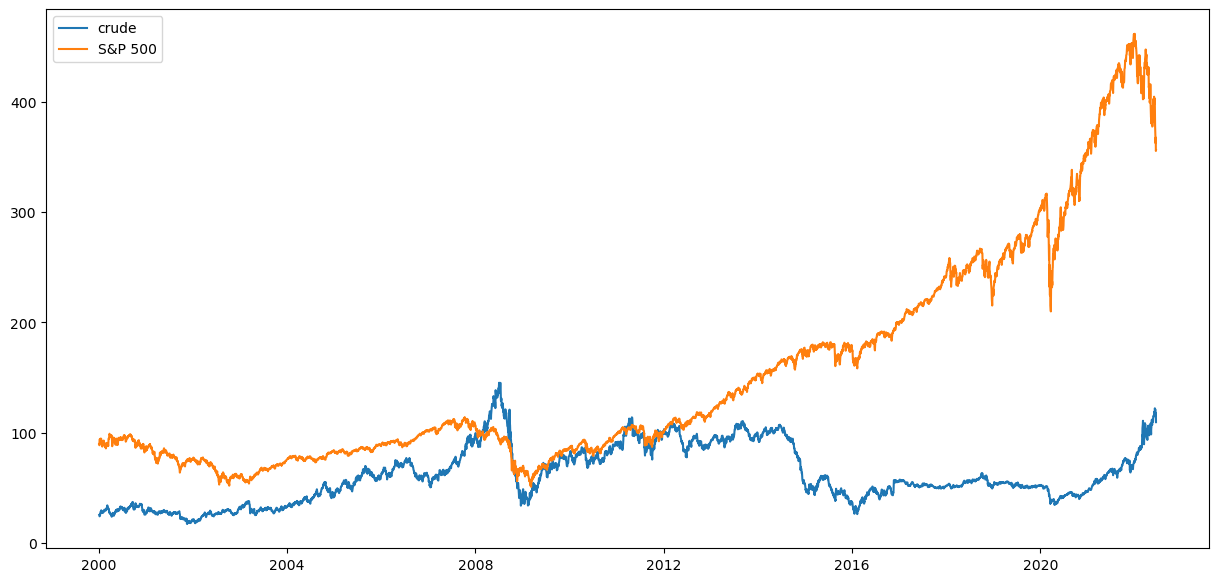

In [51]:
plt.figure(figsize = (15, 7))
plt.plot(crude_comp, label = "crude")
plt.plot(sp500_comp, label = "S&P 500")
plt.legend()

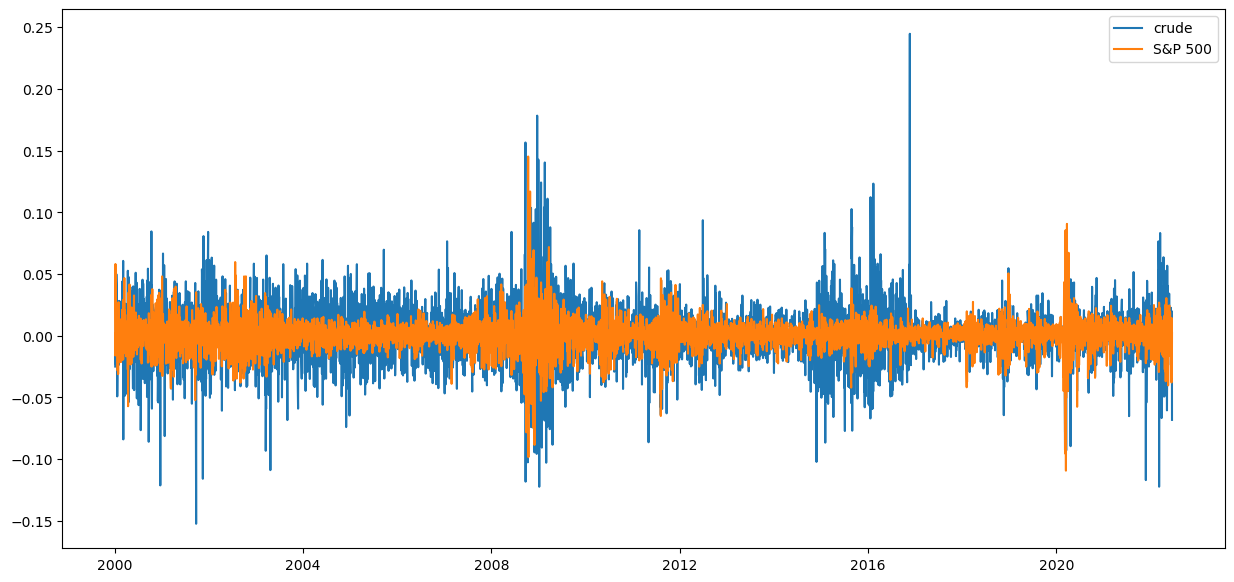

In [53]:
plt.figure(figsize = (15, 7))
plt.plot(crude_comp.pct_change()[1:], label = "crude")
plt.plot(sp500_comp.pct_change()[1:], label = "S&P 500")
plt.legend()



In [54]:
## Correlation from 2000-2022
np.corrcoef(crude_comp.pct_change()[1:], sp500_comp.pct_change()[1:])

array([[1.        , 0.21360583],
       [0.21360583, 1.        ]])

In [74]:
correlations = pd.DataFrame(columns = ['Correlation Coefficient'])
crude_pct = crude_comp.pct_change()[1:]
sp500_pct = sp500_comp.pct_change()[1:]

for year in np.arange(2000, 2023):
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    cc = np.corrcoef(crude_pct[start_date : end_date], sp500_pct[start_date : end_date])[0, 1]
    correlations.loc[year, 'Correlation Coefficient'] = cc
correlations

,Correlation Coefficient
2000,-0.049255
2001,-0.063597
2002,0.137639
2003,-0.261219
2004,-0.091722
2005,-0.033178
2006,0.011262
2007,0.070265
2008,0.27389
2009,0.452869


Sometimes the market is controlled by oil, sometimes other industries take control

- 2000-2004: Dot-com bubble crash + stabilization
- 2009-2016: QE leads to high correlation as everything goes up
- --> https://www.cmegroup.com/education/files/why-are-equities-moving-in-tandem-with-oil.pdf
- 2020-2021: Oil and stock prices both heavily dependent on covid news, lockdowns
- 2022: Tech dominates S&P returns

Other factors affecting oil to look at:
- Conflict in oil-producing countries 
    - Middle East wars (Yom Kippur, Gulf War, etc) and Russia/Ukraine generally lead to short-term spike
- OPEC's bullshit
    - Oil's price surge over the last year is mostly due to OPEC+ cutting supply. Non-OPEC countries (like US) are still near ATH for production though
- Long-term shift towards alternative energy sources
    - Many forecasters have oil significantly decreasing in price by 2030 (despite very high inflation)